In [35]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [36]:
#read csv file from online github 
df2 = 'https://raw.githubusercontent.com/leningschulich/schulich_data_science/main/experiment_dataset.csv'
df = pd.read_csv(df2)
df

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
1,1,18,Location1,Device1,Variant B,11.310518,0.096859
2,2,21,Location2,Device1,Variant B,24.842100,0.097630
3,3,21,Location1,Device3,Variant B,20.061300,0.109783
4,4,57,Location1,Device2,Variant B,34.495503,0.068579
...,...,...,...,...,...,...,...
995,995,39,Location2,Device2,Variant B,17.252030,0.092211
996,996,38,Location3,Device2,Control,30.075898,0.078151
997,997,60,Location2,Device3,Control,31.929223,0.125213
998,998,35,Location2,Device2,Variant B,14.680299,0.095423


In [37]:
df.info() # understanding our DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Age         1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Device      1000 non-null   object 
 4   Variant     1000 non-null   object 
 5   Time Spent  1000 non-null   float64
 6   CTR         1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [38]:
distinct_values_Location = df['Location'].unique()
distinct_values_Variant = df['Variant'].unique()
distinct_values_Devicen = df['Device'].unique()
print(distinct_values_Location)
print(distinct_values_Variant)
print(distinct_values_Devicen)

['Location2' 'Location1' 'Location3']
['Control' 'Variant B' 'Variant A']
['Device2' 'Device1' 'Device3']


We can find that there is no none value in the file, and there are three distinguish value exist in column Location, Device and Variant.

In [39]:
df.describe(include = 'all')

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
count,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000
unique,NaN,NaN,3,3,3,NaN,NaN
top,NaN,NaN,Location2,Device3,Control,NaN,NaN
freq,NaN,NaN,343,346,340,NaN,NaN
mean,499.500000,40.715000,NaN,NaN,NaN,22.713345,0.109145
std,288.819436,13.655557,NaN,NaN,NaN,5.479292,0.022366
min,0.000000,18.000000,NaN,NaN,NaN,7.114806,0.012975
25%,249.750000,28.000000,NaN,NaN,NaN,19.216608,0.094286
50%,499.500000,41.000000,NaN,NaN,NaN,22.506707,0.108944
75%,749.250000,53.000000,NaN,NaN,NaN,26.255950,0.124238


In [40]:
df['CTR'].median()

0.10894365182827664

In [41]:
df['Time Spent'].median()

22.506707371240026

We can find that the median and mean value of CTR are similar, so does the value in Time Spent. As a result, we assume normal distribution for the data. 

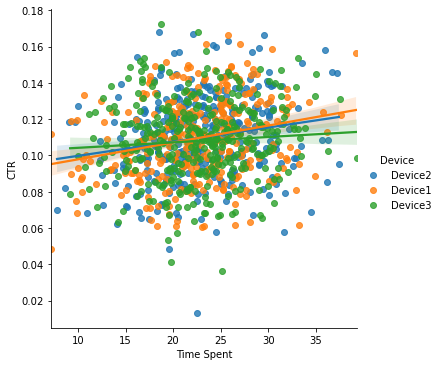

In [16]:
sns.lmplot(data = df, x='Time Spent', y='CTR', hue = 'Device')

We are comparing the CTR versus the Time Spent via different device. It's clearly that there are not big difference for the distribution among three devices.

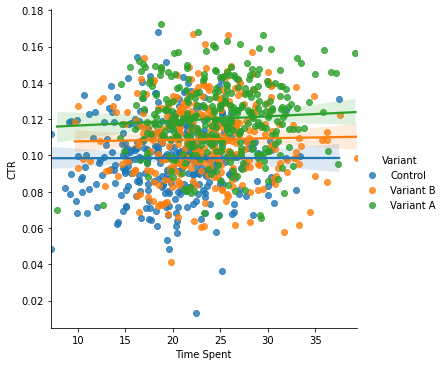

In [18]:
sns.lmplot(data = df, x='Time Spent', y='CTR', hue = 'Variant')

We then compare the CTR versus the Time Spent via different Variant. It's clearly that Variant A has the highest CTR line, Variant B has the second highest CTR line, and control growp, given the same time spent, has the lowest CTR.

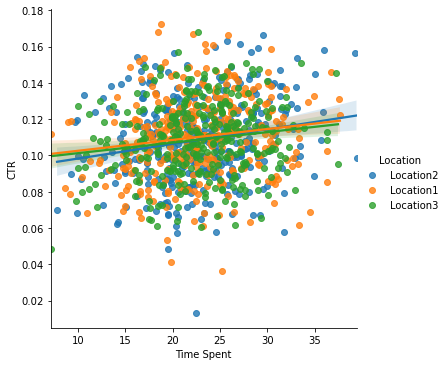

In [17]:
sns.lmplot(data = df, x='Time Spent', y='CTR', hue = 'Location')

We are comparing the CTR versus the Time Spent via different locations. It's clearly that there are no big difference for the distribution among three locations.

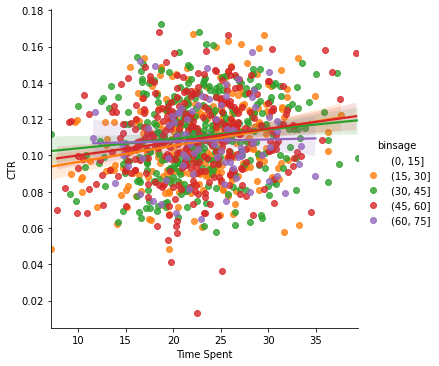

In [72]:
df['binsage'] = pd.cut(df['Age'], bins=[0, 15,30,45, 60,75])
sns.lmplot(data = df, x='Time Spent', y='CTR', hue = 'binsage')

Finally, We are comparing the CTR versus the Time Spent via different age group. It's clearly that there are not big difference for the distribution among age groups.

We can conclude that Variant A and Variant B results in CTR lift given same time spent. Variant A has a higher lift than Variant B.

Right now, we conduct at test with a null hypothsis, which is the means of two independent groups, Variant A and Control, are equal to each other.

In [44]:

Variation_A_time = df[df['Variant'] == 'Variant A']['Time Spent']
Variation_B_time = df[df['Variant'] == 'Variant B']['Time Spent']
Control_time = df[df['Variant'] == 'Control']['Time Spent']

t_stat, p_val = stats.ttest_ind(Variation_A_time, Control_time)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 12.142363487472364
P-value: 8.488565644996449e-31


According to the p-value, we can reject the null hypothsis, thus the means of two independent groups, Variant A and Control, are not equal to each other.

Then we conduct a null hypothsis, which is the means of two independent groups, Variant B and Control, are equal to each other.

In [45]:
t_stat2, p_val2 = stats.ttest_ind(Variation_B_time, Control_time)

print(f"T-statistic: {t_stat2}")
print(f"P-value: {p_val2}")

T-statistic: 8.174237395991806
P-value: 1.496358076285182e-15


According to the p-value, we can reject the null hypothsis, thus means of two independent groups, Variant A and Control, are not equal to each other.

In [52]:
df['CTR'].max()

0.1727281912960165

We conduct a chi-squared test, with null hypothesis: there is no significant association between two variables (CTR and Variant) in the sample.

In [54]:
# Convert 'sepal_width' to a categorical variable
df['bins'] = pd.cut(df['CTR'], bins=[0, 0.05,0.10,0.15, 0.2])

# Create a contingency table
contingency_table = pd.crosstab(df['Variant'], df['bins'])

chi2, p_val3, dof, expected = stats.chi2_contingency(contingency_table)
# determine whether there is a significant association between two 
# categorical variables in a dataset.
print(f"Chi-squared: {chi2}")
print(f"P-value: {p_val3}")

Chi-squared: 118.72665767798219
P-value: 3.0162643329434613e-23


We reject null hythosis, and there is significant association between CTR and Variant. 

In [55]:
df['Time Spent'].max()

39.39576963064553

We conduct a chi-squared test, with null hypothesis: there is no significant association between two variables (time spent and Variant) in the sample.

In [56]:
# Convert 'sepal_width' to a categorical variable
df['bins'] = pd.cut(df['Time Spent'], bins=[0, 10,20,30, 40])

# Create a contingency table
contingency_table = pd.crosstab(df['Variant'], df['bins'])

chi3, p_val4, dof, expected = stats.chi2_contingency(contingency_table)
# determine whether there is a significant association between two 
# categorical variables in a dataset.
print(f"Chi-squared: {chi3}")
print(f"P-value: {p_val4}")

Chi-squared: 94.26037538644832
P-value: 3.941051460863924e-18


We reject null hythosis, and there is significant association between time spent and Variant. 

We conduct a chi-squared test, with null hypothesis: there is no significant association between two variables (Age and Variant) in the sample.

In [70]:
# Convert 'sepal_width' to a categorical variable
df['bins'] = pd.cut(df['Age'], bins=[0, 15,30,45, 60,75])

# Create a contingency table
contingency_table = pd.crosstab(df['Variant'], df['bins'])

chi3, p_val4, dof, expected = stats.chi2_contingency(contingency_table)
# determine whether there is a significant association between two 
# categorical variables in a dataset.
print(f"Chi-squared: {chi3}")
print(f"P-value: {p_val4}")

Chi-squared: 9.470448839225005
P-value: 0.14879749029825198


We fail to reject null hythosis, and there is not significant association between Age and Variant. 

Then, we check if different locations/devices influence the time spent and CTR give same variant.

In [86]:
df2 = df[df['Variant'] == 'Variant A']
lo_1 = df2[df2['Location'] == 'Location1']['Time Spent']
lo_2 = df2[df2['Location'] == 'Location2']['Time Spent']
lo_3 = df2[df2['Location'] == 'Location3']['Time Spent']

f_stat, p_val = stats.f_oneway(lo_1, lo_2, lo_3)
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 0.10786865370947403
P-value: 0.8977774352465532


Given same Variant, we fail to reject the null hypothesis, which means given Variant A, there is no difference for time Spent among three different locations.

In [85]:
df2 = df[df['Variant'] == 'Variant A']
lo_1 = df2[df2['Location'] == 'Location1']['CTR']
lo_2 = df2[df2['Location'] == 'Location2']['CTR']
lo_3 = df2[df2['Location'] == 'Location3']['CTR']

f_stat, p_val = stats.f_oneway(lo_1, lo_2, lo_3)
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 1.2708992496308231
P-value: 0.28196134434679604


Given same Variant, we fail to reject the null hypothesis, which means given Variant A, there is no difference for CTR among three different locations.

In [90]:
lo_1 = df2[df2['Device'] == 'Device1']['CTR']
lo_2 = df2[df2['Device'] == 'Device2']['CTR']
lo_3 = df2[df2['Device'] == 'Device3']['CTR']

f_stat, p_val = stats.f_oneway(lo_1, lo_2, lo_3)
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 1.7320204846271345
P-value: 0.1785456849076847


Given same Variant, we fail to reject the null hypothesis, which means given Variant A, there is no difference for CTR among three different devices.

In [91]:
lo_1 = df2[df2['Device'] == 'Device1']['Time Spent']
lo_2 = df2[df2['Device'] == 'Device2']['Time Spent']
lo_3 = df2[df2['Device'] == 'Device3']['Time Spent']

f_stat, p_val = stats.f_oneway(lo_1, lo_2, lo_3)
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 0.6105113572129157
P-value: 0.5436909187739365


Given same Variant, we fail to reject the null hypothesis, which means given Variant A, there is no difference for Time Spent among three different devices.

In [84]:
df3 = df[df['Variant'] == 'Variant B']
lo_1 = df3[df3['Location'] == 'Location1']['Time Spent']
lo_2 = df3[df3['Location'] == 'Location2']['Time Spent']
lo_3 = df3[df3['Location'] == 'Location3']['Time Spent']

f_stat, p_val = stats.f_oneway(lo_1, lo_2, lo_3)
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 0.7282411459489527
P-value: 0.4835386034301028


Given same Variant, we fail to reject the null hypothesis, which means given Variant B, there is no difference for time Spent among three different locations.

In [83]:
df3 = df[df['Variant'] == 'Variant B']
lo_1 = df3[df3['Location'] == 'Location1']['CTR']
lo_2 = df3[df3['Location'] == 'Location2']['CTR']
lo_3 = df3[df3['Location'] == 'Location3']['CTR']

f_stat, p_val = stats.f_oneway(lo_1, lo_2, lo_3)
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 0.7332333999893166
P-value: 0.4811413587711958


Given same Variant, we fail to reject the null hypothesis, which means given Variant B, there is no difference for CTR among three different locations.

In [88]:
lo_1 = df3[df3['Device'] == 'Device1']['CTR']
lo_2 = df3[df3['Device'] == 'Device2']['CTR']
lo_3 = df3[df3['Device'] == 'Device3']['CTR']

f_stat, p_val = stats.f_oneway(lo_1, lo_2, lo_3)
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 1.7320204846271345
P-value: 0.1785456849076847


Given same Variant, we fail to reject the null hypothesis, which means given Variant B, there is no difference for CTR among three different devices.

In [89]:
lo_1 = df3[df3['Device'] == 'Device1']['Time Spent']
lo_2 = df3[df3['Device'] == 'Device2']['Time Spent']
lo_3 = df3[df3['Device'] == 'Device3']['Time Spent']

f_stat, p_val = stats.f_oneway(lo_1, lo_2, lo_3)
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 0.6105113572129157
P-value: 0.5436909187739365


Given same Variant, we fail to reject the null hypothesis, which means given Variant B, there is no difference for time Spent among three different devices.

Now, let's see if there is a difference between the means of all 3 groups
<br> Null hypothesis: the mean of the time spent for group Variant: VariantA, VariantB and Control are the same

In [82]:
Va_A = df[df['Variant'] == 'Variant A']['Time Spent']
Va_B = df[df['Variant'] == 'Variant B']['Time Spent']
Control_group = df[df['Variant'] == 'Control']['Time Spent']

f_stat, p_val = stats.f_oneway(Va_A, Va_B, Control_group)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 75.60840947416146
P-value: 2.676826588910432e-31


This indicates strong evidence of at least one significant difference of the mean time spent among the Variant.

Then, let's see if there is a difference between the means of CTR for all 3 groups
<br> Null hypothesis: the mean of the CTR for Variant: VariantA, VariantB and Control are the same

In [92]:
Va_A2 = df[df['Variant'] == 'Variant A']['CTR']
Va_B2 = df[df['Variant'] == 'Variant B']['CTR']
Control_group2 = df[df['Variant'] == 'Control']['CTR']

f_stat, p_val = stats.f_oneway(Va_A2, Va_B2, Control_group2)
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 93.58891593622702
P-value: 5.638952705781554e-38


This indicates strong evidence of at least one significant difference of the mean CTR among the Variant.

Now, we calculate the correlation between two continuous variable.

Null hypothesis of no correlation between Time spent and CTR.

In [62]:
pearson_corr, p_val = stats.pearsonr(df['Time Spent'], df['CTR'])

print(f"Pearson's correlation: {pearson_corr}")
print(f"P-value: {p_val}")

Pearson's correlation: 0.1635978763372835
P-value: 1.9711876643636142e-07


We can find the p-value is close to 0, which means there is a high probability that a linear relationship between CTR and Time spent.

We also try the Kruskal-Wallis test:

In [64]:

VA = df[df['Variant'] == 'Variant A']['CTR']
VB = df[df['Variant'] == 'Variant B']['CTR']
CO = df[df['Variant'] == 'Control']['CTR']

H, pval = stats.kruskal(VA, VB, CO)
#compare the medians of two or more independent samples.


print('The test statistic:', H)
print('The p-value of the test:', pval)

The test statistic: 162.2144623750578
The p-value of the test: 5.964541337211197e-36


We can conclude that there are significant differences in the CTR distributions between the three groups.

In [73]:

VA = df[df['Variant'] == 'Variant A']['Time Spent']
VB = df[df['Variant'] == 'Variant B']['Time Spent']
CO = df[df['Variant'] == 'Control']['Time Spent']

H, pval = stats.kruskal(VA, VB, CO)
#compare the medians of two or more independent samples.


print('The test statistic:', H)
print('The p-value of the test:', pval)

The test statistic: 128.94233881092168
The p-value of the test: 1.0012139345952818e-28


We can conclude that there are significant differences in the time spent distributions between the three groups.

In conclusion, we can say that the mean time spent and CTR for Variant A and Variant B are significantly different from the mean time spent and CTR of the Control group. This indicates a significant association between CTR and the variant, as well as time spent and the variant. Furthermore, there is a strong probability that there is a linear relationship between CTR and time spent.

Based on the findings of the analysis, I highly recommend that the engineering team consider deploying Variant A. Both variants demonstrated significant differences in user engagement(Click-Through-Rate) when compared to the Control group. However, Variant A has the highest CTR given same time spent. This suggests that Variant A may provide a higher value when it comes to user engagement. For location and device factor, it's clearly that these two factors have little influence for the Variants.

Rollout Plan:

Objectives:
Increase user engagement and improve click-through rates (CTR).
Deploy a new feature that has shown significant differences in user engagement compared to the Control group.

Variant Selection:
Based on the analysis, choose Variant A for deployment.

Define key performance indicators (KPIs): 
To measure the success of the rollout, we can monitor the changes of CTR given different portion of users to assess the impact of the deployed feature.

Rollout Timeline:
Phase 1: Rollout to 5% of users to monitor the changes of key metrics, like CTR and time Spent, evaluate the impact of the feature changes, check user feedback.

Phase 2: Rollout to 10% of users to monitor the changes of key metrics, like CTR and time Spent, evaluate the impact of the feature changes and compare the result with previous phase, check user feedback.

Phase 3: Rollout to 25% of users to monitor the changes of key metrics, like CTR and time Spent, evaluate the impact of the feature changes and compare the result with previous phase, check user feedback.

Phase 4: Continue to rollout the percentage of users until fully apply to all users. Continue to monitor the changes of key metrics, like CTR and time Spent, evaluate the impact of the feature changes and compare the result with previous phase, check user feedback and improve the feature.


